# GOES distribution of longitudes and latitudes

In [ ]:
import bolides

In [1]:
from bolideclusters import *
lon_360, lon_360_cdf, all_lon_sim, all_lon_sim_cdf, pvals_lon, lat, lat_cdf_vals, all_lat_sim, all_lat_sim_cdf, pvals_lat = run_sims('goes')

/home/kchen/miniconda3/envs/bolides/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
downloading: 22.9MiB [00:00, 59.7MiB/s]
100%|██████████| 99/99 [00:40<00:00,  2.45it/s]


In [115]:
def derivative(all_sim, all_sim_cdf, real_x, n):
    """
    Calculates the derivative graph of each simulation

    Inputs:
    all_sim: 2D array of all simulations for lat or lon
    all_sim_cdf: 2d array of those corresponding y vals
    n: bin width float
    """
    y_interp_sim, x_sim = interp(all_sim, all_sim_cdf, real_x)
    all_binned_x = []

    all_d = [] # all derivatives, the y axis
    for i in range(len(y_interp_sim)):
        binned_x, binned_y = fast_bin_spectrum(x_sim, y_interp_sim[i], n)
        

        d = np.gradient(binned_y)
        all_d.append(d)


    # calc percentiles
    lower = np.percentile(all_d, 5, axis=0)
    upper = np.percentile(all_d, 95, axis=0)
    median = np.percentile(all_d, 50, axis=0)
    return lower, upper, median, binned_x

In [116]:
def plot_sims(title, lon_360, lon_360_cdf, all_lon_sim, all_lon_sim_cdf, pvals_lon, lat, lat_cdf_vals, all_lat_sim, all_lat_sim_cdf, pvals_lat):
    # number of x's per bin
    n = 5
    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(16, 16), dpi=300)

    # Latitude CDF
    axes[0,0].plot(lat, lat_cdf_vals, marker='.', linestyle='-', color='#0072B2', label='Observed')
    # interpolate the simulated and observations
    y_interp_lat_sim, x_lat_sim = interp(all_lat_sim, all_lat_sim_cdf, lat)
    y_interp_lat_obs, x_lat_obs = interp([lat], [lat_cdf_vals], lat)
    lower_percentile_lat = np.percentile(y_interp_lat_sim, 5, axis=0)
    upper_percentile_lat = np.percentile(y_interp_lat_sim, 95, axis=0)
    median_lat = np.percentile(y_interp_lat_sim, 50, axis=0)

   
    # bin the sims and obs (since inconsistant slopes from point to point)
    # binned_x_median_lat, binned_y_median_lat = fast_bin_spectrum(x_lat_sim, median_lat, n)
    # binned_x_lower_lat, binned_y_lower_lat = fast_bin_spectrum(x_lat_sim, lower_percentile_lat, n)
    # binned_x_upper_lat, binned_y_upper_lat = fast_bin_spectrum(x_lat_sim, upper_percentile_lat, n)
    binned_x_lat, binned_y_lat = fast_bin_spectrum(x_lat_obs, y_interp_lat_obs[0], n)
    # d_lower_lat = np.gradient(binned_y_lower_lat, binned_x_median_lat)
    # d_upper_lat = np.gradient(binned_y_upper_lat, binned_x_median_lat)
    # d_median_lat = np.gradient(binned_y_median_lat, binned_x_median_lat)
    d_lower_lat, d_upper_lat, d_median_lat, binned_x_lat = derivative(all_lat_sim, all_lat_sim_cdf, lat, n)
    dy_lat = np.gradient(binned_y_lat)

    axes[0,0].plot(x_lat_sim, median_lat, marker='.', linestyle='-', color='#CE619D', label='Simulated median (binned)')
    axes[0,0].fill_between(x_lat_sim, lower_percentile_lat, upper_percentile_lat, color='#CC79A7', alpha=.5, label='Simulated (middle 90%)')
    axes[0,0].set_xlabel('Latitude (degrees)', fontsize=17)
    axes[0,0].set_ylabel('CDF', fontsize=17)
    axes[0,0].set_title('CDF of Latitude: ' + title + '\np-value = ' + str(np.mean(pvals_lat)), fontsize=18)
    axes[0,0].tick_params(axis='both', labelsize=15)
    axes[0,0].grid()
    axes[0,0].legend(fontsize=17)
    y_min = np.minimum(d_lower_lat, d_upper_lat)
    y_max = np.maximum(d_lower_lat, d_upper_lat)
    # Latitude derivative
    axes[1,0].fill_between(binned_x_lat, y_min, y_max, color='#CC79A7', alpha=.5, label='Simulated (binned middle 90%)')
    axes[1,0].plot(binned_x_lat, d_median_lat, marker='.', linestyle='-', color='#CC79A7', label='Simulated median(binned)')
    axes[1,0].plot(binned_x_lat, dy_lat, marker='.', linestyle='-', color='#0072B2', label='Observed (binned)')
    axes[1,0].set_xlabel('Latitude (degrees)', fontsize=17)
    axes[1,0].set_ylabel('CDF Slope', fontsize=17)
    axes[1,0].set_title('CDF Slope of Latitude: ' + title, fontsize=18)
    axes[1,0].tick_params(axis='both', labelsize=15)
    axes[1,0].grid()
    axes[1,0].legend(fontsize=17)

    # Longitude CDF
    axes[0, 1].plot(lon_360, lon_360_cdf, marker='.', linestyle='-', color='#0072B2', label='Observed')
    # interpolate the simulated and observations
    y_interp_lon_sim, x_lon_sim = interp(all_lon_sim, all_lon_sim_cdf, lon_360)
    y_interp_lon_obs, x_lon_obs = interp([lon_360], [lon_360_cdf], lon_360)
    lower_percentile_lon = np.percentile(y_interp_lon_sim, 5, axis=0)
    upper_percentile_lon = np.percentile(y_interp_lon_sim, 95, axis=0)
    median_lon = np.percentile(y_interp_lon_sim, 50, axis=0)

    # bin the sims and obs (since inconsistant slopes from point to point)
    # binned_x_median_lon, binned_y_median_lon = fast_bin_spectrum(x_lon_sim, median_lon, n)
    # binned_x_lower_lon, binned_y_lower_lon = fast_bin_spectrum(x_lon_sim, lower_percentile_lon, n)
    # binned_x_upper_lon, binned_y_upper_lon = fast_bin_spectrum(x_lon_sim, upper_percentile_lon, n)
    binned_x_lon, binned_y_lon = fast_bin_spectrum(x_lon_obs, y_interp_lon_obs[0], n)
    # d_median_lon = np.gradient(binned_y_median_lon, binned_x_median_lon)
    # d_lower_lon = np.gradient(binned_y_lower_lon,binned_x_median_lon)
    # d_upper_lon = np.gradient(binned_y_upper_lon,binned_x_median_lon)
    d_lower_lon, d_upper_lon, d_median_lon, binned_x_lon1 = derivative(all_lon_sim, all_lon_sim_cdf, lon_360, n)
    dy_lon = np.gradient(binned_y_lon)
    print(dy_lon)

    axes[0, 1].plot(x_lon_sim, median_lon, marker='.', linestyle='-', color='#CE619D', label='Simulated median (binned)')
    axes[0, 1].fill_between(x_lon_sim, lower_percentile_lon, upper_percentile_lon, color='#CC79A7', alpha=.5, label='Simulated (middle 90%)')
    axes[0, 1].set_xlabel('Longitude (degrees)', fontsize=17)
    axes[0, 1].set_ylabel('CDF', fontsize=17)
    axes[0, 1].set_title('CDF of Longitude: ' + title + '\np-value = '+ str(np.mean(pvals_lon)), fontsize=18)
    axes[0, 1].tick_params(axis='both', labelsize=15)
    axes[0, 1].grid()
    axes[0, 1].legend(fontsize=17)
    

    #Longitude derivative
    axes[1,1].fill_between(binned_x_lon1, d_lower_lon, d_upper_lon, color='#CC79A7', alpha =.5, label='Simulated (binned middle 90%)')
    axes[1,1].plot(binned_x_lon1, d_median_lon, marker='.', linestyle='-', color='#CC79A7', label='Simulated median(binned)')
    axes[1,1].plot(binned_x_lon, dy_lon, marker='.', linestyle='-', color='#0072B2', label='Observed (binned)')
    # axes[1,1].set_yscale('log')
    axes[1,1].set_xlabel('Longitude (degrees)', fontsize=17)
    axes[1,1].set_ylabel('CDF Slope', fontsize=17)
    axes[1,1].set_title('CDF Slope of Longitude: ' + title, fontsize=18)
    axes[1,1].tick_params(axis='both', labelsize=15)
    axes[1,1].grid()
    axes[1,1].legend(fontsize=17)

    plt.tight_layout()
    plt.show()

[0.01884603 0.02215285 0.02975307 0.03917454 0.04546738 0.0494302
 0.0508222  0.05060242 0.05119801 0.04972206 0.05140516 0.04769167
 0.03162111 0.013798   0.00439788 0.00233945 0.00116592 0.00034254
 0.00015582 0.00015949 0.00027682 0.00180572 0.01060331 0.02603429
 0.03569085 0.03751225 0.04092101 0.04262948 0.03945444 0.03990182
 0.03932244 0.03622367 0.03586684 0.03135411 0.01917067 0.01168273]


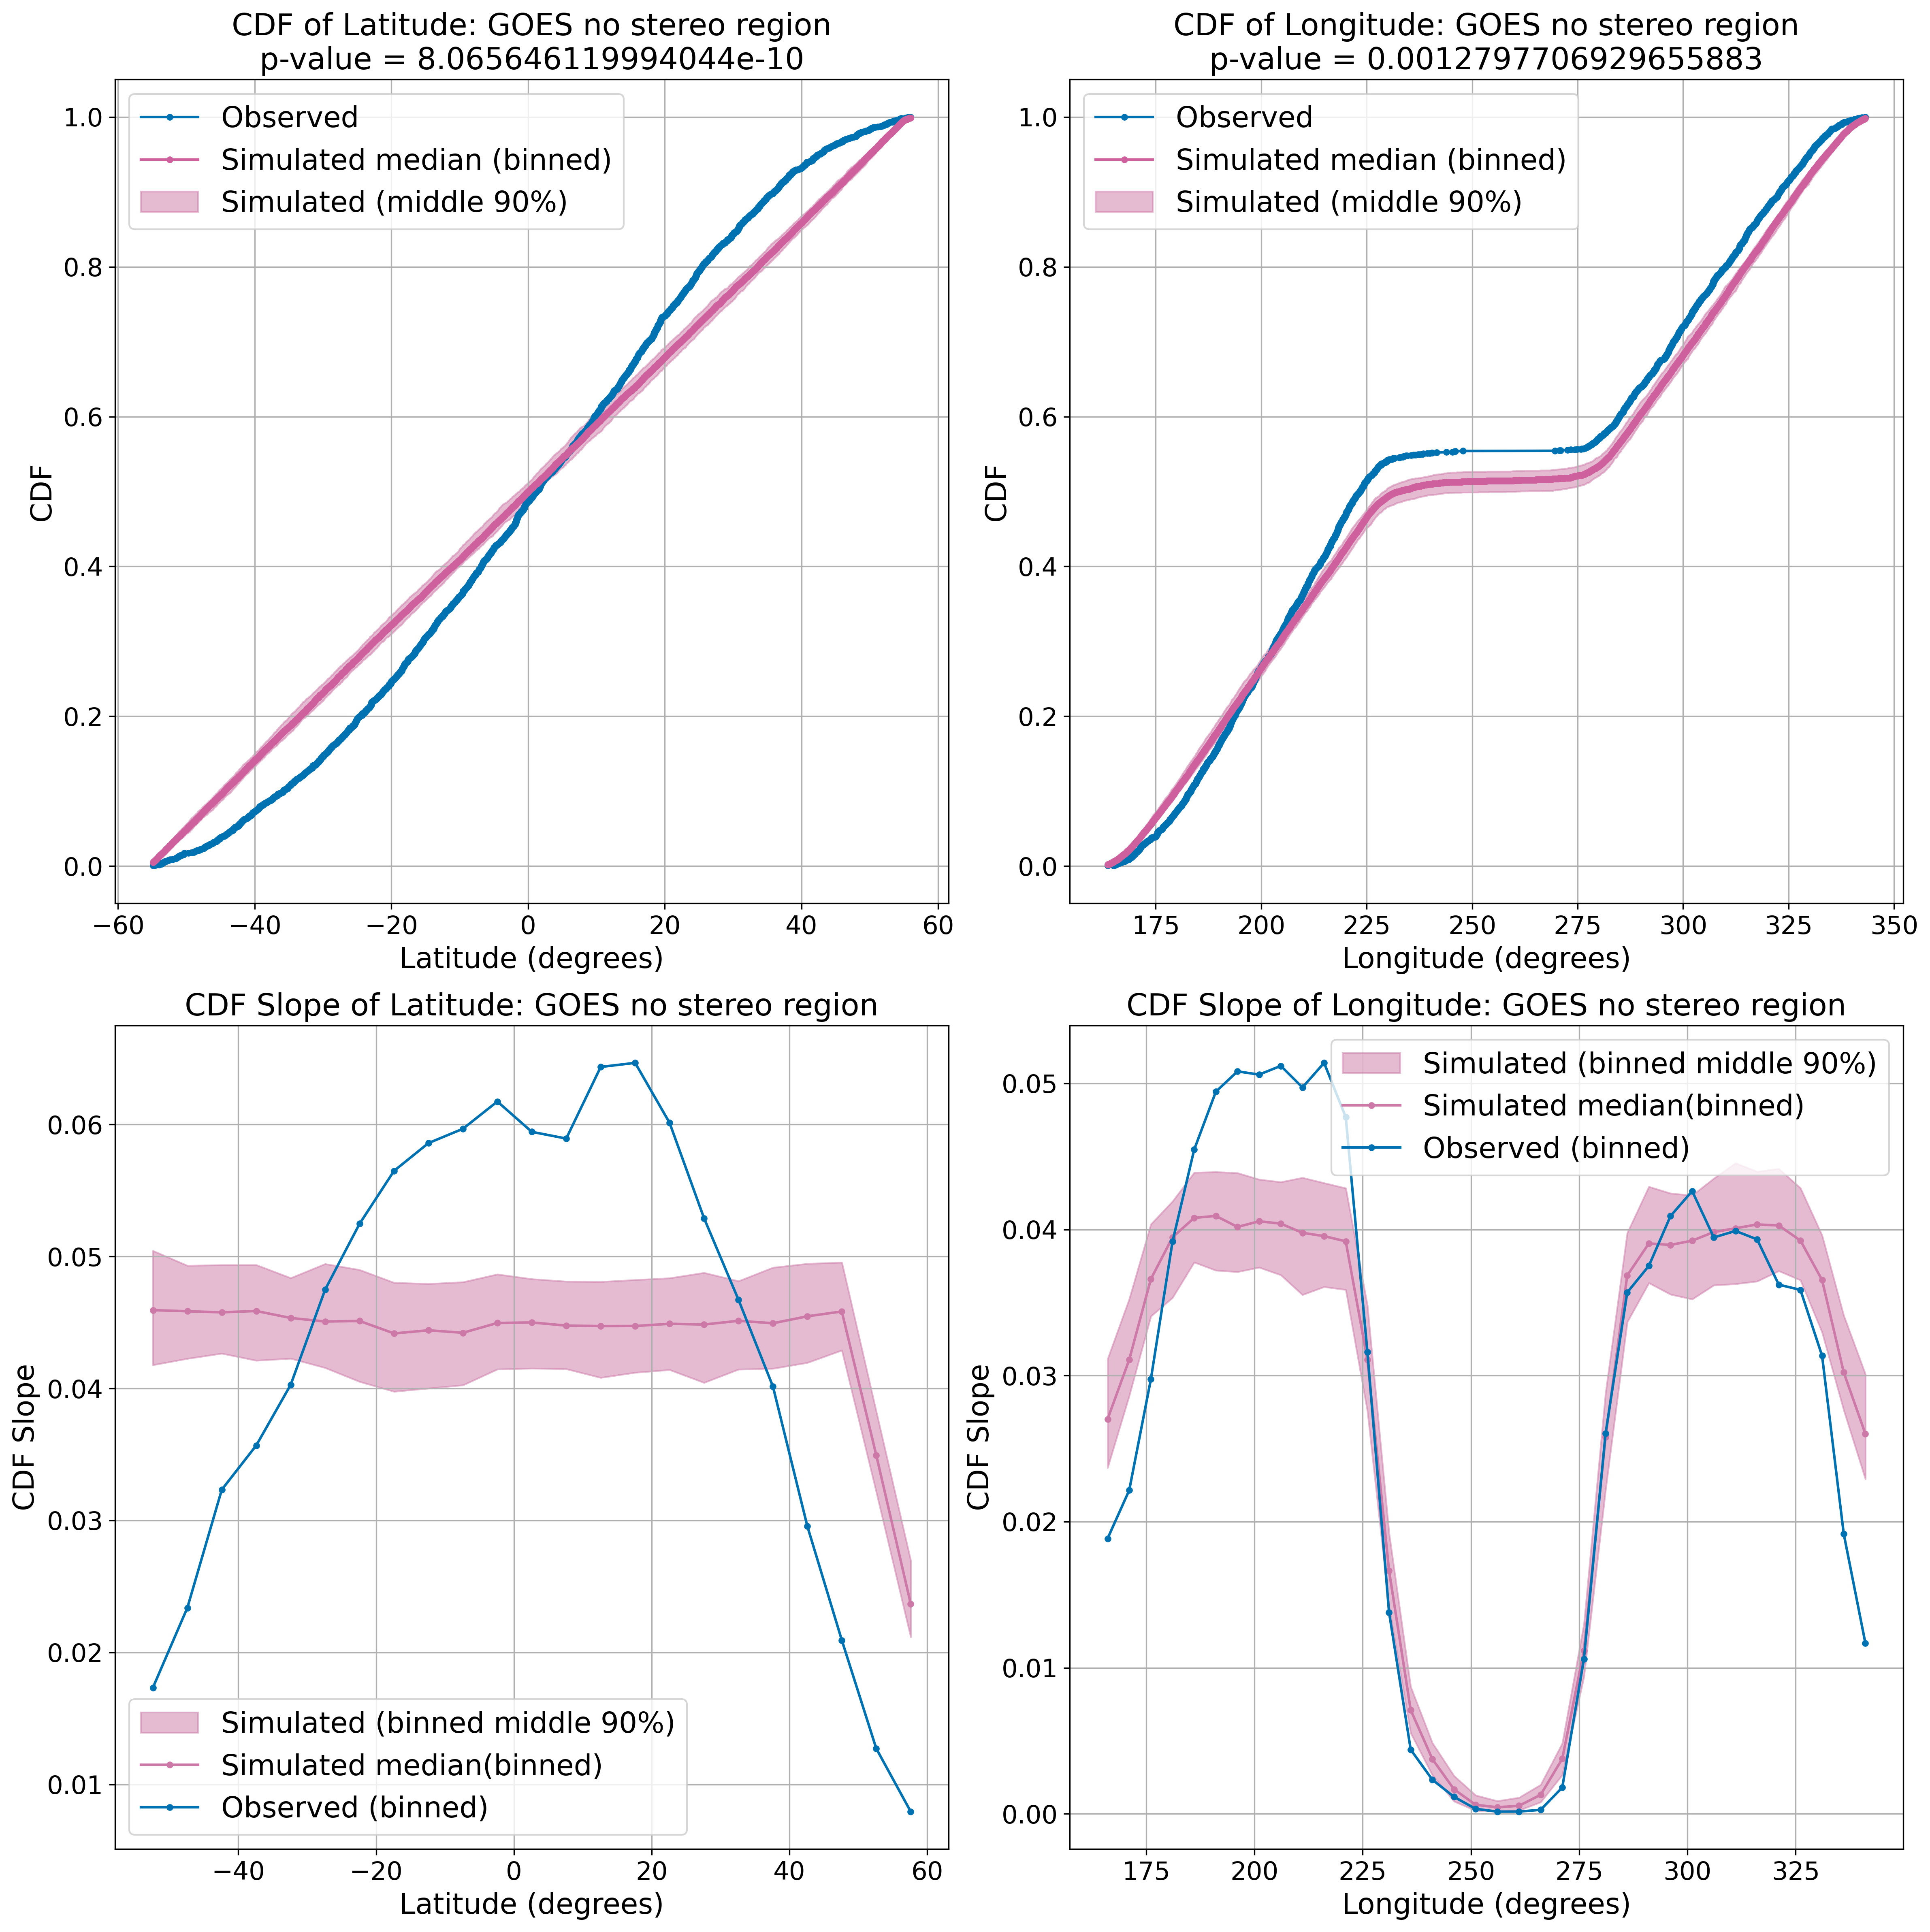

In [117]:
plot_sims('GOES no stereo region', lon_360, lon_360_cdf, all_lon_sim, all_lon_sim_cdf, pvals_lon, lat, lat_cdf_vals, all_lat_sim, all_lat_sim_cdf, pvals_lat)

In [ ]:
lat, lon = compare_pvals_showers()

In [ ]:
lon

In [ ]:
from bolideclusters import *
plot_cdf('goes-w', 'GOES-West (Including Stereo Region)', stereo=True)

In [ ]:
plot_cdf('goes-w', 'GOES-West (No Stereo Region)', stereo=False)

In [ ]:
plot_cdf('goes-e', 'GOES-East (No Stereo Region)', stereo=False)

In [ ]:
plot_cdf('goes-e', 'GOES-East (Including Stereo Region)', stereo=True)

In [ ]:
plot_cdf('goes', 'GOES (No Stereo Region)', stereo=False)
# np.prctle(x,95)
# diff in ks test curve vs number of showers removed

In [ ]:
plot_cdf('goes', 'GOES (Including Stereo Region)', stereo=True)

In [ ]:
plot_cdf('goes', 'Just Stereo Region', stereo=True, just_stereo=True)

In [ ]:
import scipy.stats as stats

from bolides import fov_utils as fu
poly_west = fu.get_boundary('goes-w', collection=True, intersection=False, crs=None)
lon_samples, lat_samples = montecarlo(poly=poly_west, stereo=True, n_samples=100000, just_stereo=False)
lon_samples1, lat_samples1 = montecarlo(poly=poly_west, stereo=True, n_samples=100000, just_stereo=False)


def sim_cdf(x):
    # Returns the fraction of simulated_lats <= x
    return np.searchsorted(lat_samples, x, side='right') / len(lat_samples)

ks_statistic, p_value = stats.ks_1samp(lat_samples1, sim_cdf)

In [ ]:
p_value

In [ ]:
from bolides import ShowerDataFrame
sdf = ShowerDataFrame()

In [ ]:
codes = sdf.fastest_showers(n=123)['Code'].values

In [ ]:
sdf.fastest_showers(n=125)

In [ ]:
sdf

In [ ]:
sdf.head()

In [ ]:
years = list(range(2000, 2025))
dates = sdf.get_dates('LEO', years).datetime

In [ ]:
dates

In [ ]:
dates

In [ ]:
dates

In [ ]:
from bolides import BolideDataFrame
bdf = BolideDataFrame()

# bdf=bdf.get_closest_by_time_loc('2022-06-07 22:53:00', n=2, , time_weight=1000, loc_weight=1.0,)


In [ ]:
bdf2 = bdf.get_closest(datestr='2022-06-07 22:53:00', lon=-127, lat=41.1, k=5)

In [ ]:
bdf2

In [ ]:
bdf=bdf.filter_shower(codes, exclude=True)

In [ ]:
import matplotlib.pyplot as plt

bdf['datetime'].dt.to_pydatetime()
plt.figure(figsize=(10, 6))
plt.hist(bdf['datetime'], bins=1000)
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.title('Histogram of Bolide Event Datetimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
bdf = BolideDataFrame()


In [ ]:
bdf.filter_out_all_showers()
len(bdf)

In [ ]:
import matplotlib.pyplot as plt
# rank showers based on their median speed and get rid of ones with highest speeds
bdf['datetime'].dt.to_pydatetime()
plt.figure(figsize=(10, 6))
plt.hist(bdf['datetime'], bins=1000)
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.title('Histogram of Bolide Event Datetimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()